## Linear Regression

<b>Linear regression</b> is a linear approach to model the relationship between a dependent variable (target variable) and one (simple regression) or more (multiple regression) independent variables. Python has different libraries that allow us to plot a data set and analyze the relation between variables. In case we observe a linear trend, we can calculate the line that better fits our data and make predictions using this line. Additionally, we can measure the strength of the relationship between two variables using correlation coefficients as well as the quality of the regression model using the mean square error. Let’s get started :)

In [1]:
# Let us import the necessary library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

print("Setup complete!")

Setup complete!


### About the dataset

The dataset used in this article was obtained in Kaggle. Kaggle is an online community of data scientists and machine learners where it can be found a wide variety of datasets. The dataset selected contains the height and weight of 5000 males and 5000 females, and it can be downloaded at the following link: https://www.kaggle.com/mustafaali96/weight-height

In [2]:
# Reading the CSV file
df = pd.read_csv("C:/Users/Ashish Banerjee/Desktop/weight-height.csv")

# Printing the first five rows of the csv file
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# Shape of the dataframe
df.shape

(10000, 3)

In [4]:
# Data type of each column
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [5]:
# Number of numm values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
# Number of unique values of the column gender
df["Gender"].nunique()

2

In [7]:
# Unique values of the column Gender 
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

As we can easily observe, the dataframe contains three columns: Gender, Height, and Weight. The Gender column contains two unique values of type object: male or female. A float data type is used in the columns Height and Weight. Since the dataframe does not contain null values and the data types are the expected ones, it is not necessary to clean the data .
To better understand the distribution of the variables Height and Weight, we can simply plot both variables using histograms. Histograms are plots that show the distribution of a numeric variable, grouping data into bins. The height of the bar represents the number of observations per bin.

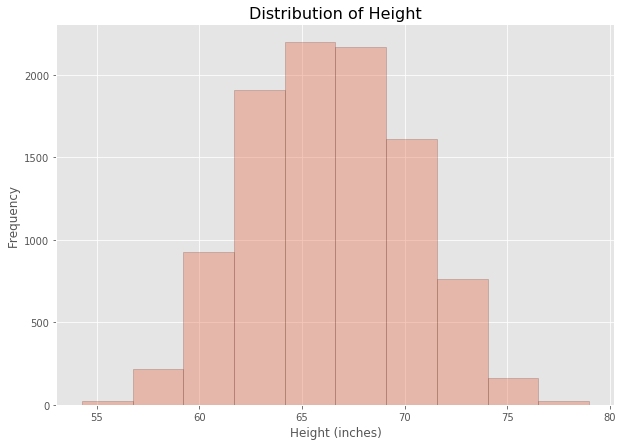

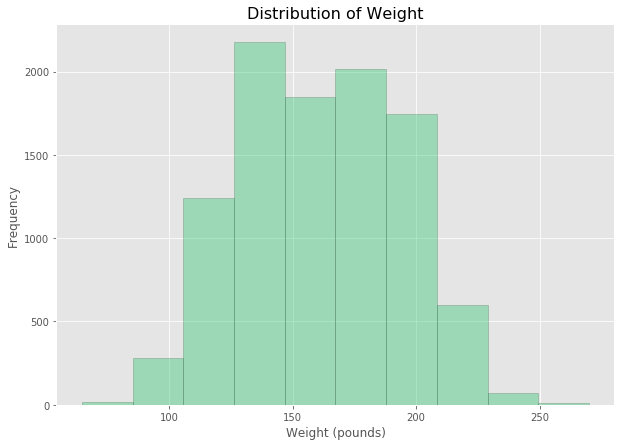

In [8]:
plt.style.use('ggplot')

# Histogram of the height
df["Height"].plot(kind="hist", color="#E77456", alpha=0.4, edgecolor="#4F1809", figsize=(10,7))
plt.title("Distribution of Height", size=16)
plt.xlabel("Height (inches)", size=12)
plt.ylabel("Frequency", size=12)
plt.show()

# Histogram of the weight
df["Weight"].plot(kind="hist", color="#2FC66F", alpha=0.4, edgecolor="#113D24", figsize=(10,7))
plt.title("Distribution of Weight", size=16)
plt.xlabel("Weight (pounds)", size=12)
plt.ylabel("Frequency", size=12)
plt.show()

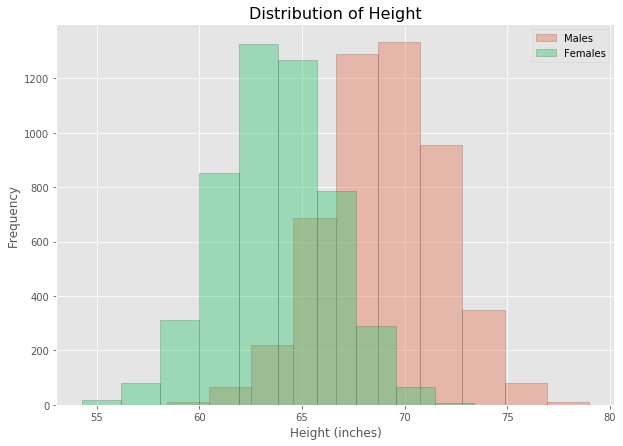

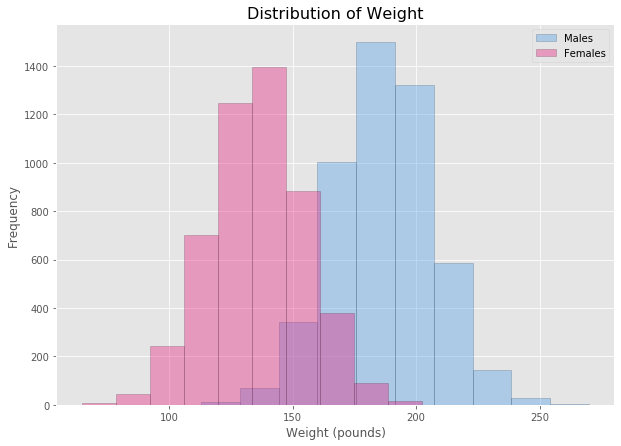

In [9]:
# Histogram of Height and Weight on the basis of Gender

# Histogram of the height
df[df["Gender"]=="Male"].Height.plot(kind="hist", color="#E77456", alpha=0.4, edgecolor="#4F1809", figsize=(10,7))
df[df["Gender"]=="Female"].Height.plot(kind="hist", color="#2FC66F", alpha=0.4, edgecolor="#113D24", figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title("Distribution of Height", size=16)
plt.xlabel("Height (inches)", size=12)
plt.ylabel("Frequency", size=12)
plt.show()

# Histogram of the weight
df[df["Gender"]=="Male"].Weight.plot(kind="hist", color="#58A2E8", alpha=0.4, edgecolor="#0A2D4D", figsize=(10,7))
df[df["Gender"]=="Female"].Weight.plot(kind="hist", color="#E42883", alpha=0.4, edgecolor="#420B26", figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title("Distribution of Weight", size=16)
plt.xlabel("Weight (pounds)", size=12)
plt.ylabel("Frequency", size=12)
plt.show()

In [10]:
# Descriptive Statistics for Male
statistics_male = df[df["Gender"]=="Male"].describe()
statistics_male.rename(columns=lambda x:x+"_male", inplace="True")

# Descriptive Statistics for Female
statistics_female = df[df["Gender"]=="Female"].describe()
statistics_female.rename(columns=lambda x:x+"_female", inplace="True")

# Dataframce that contains statistics for both Male and Female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


<b>Exploratory data analysis</b> consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumption before we perform further evaluations. After performing the exploratory analysis, we can conclude that height and weight are normal distributed. Males distributions present larger average values, but the spread of distributions compared to female distributions is really similar.
But maybe at this point you ask yourself: There is a relation between height and weight? Can I use the height of a person to predict his weight?<br>
The answer of both question is YES! 😃 💪 Let’s continue ▶️ ▶️

### Scatter plots with Matplotlib and linear regression with Numpy

A <b>Scatter plot</b> is a two dimensional data visualization that shows the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis. Matplotlib is a Python 2D plotting library that contains a built-in function to create scatter plots the matplotlib.pyplot.scatter() function.
The following plot shows the relation between height and weight for males and females. The visualization contains 10000 observations that is why we observe overplotting. Overplotting occurs when the data overlap in a visualization, making difficult to visualize individual data points. In this case, the cause is the large number of data points (5000 males and 5000 females). Another reason can be a small number of unique values; for instance, when one of the variables of the scatter plot is a discrete variable.


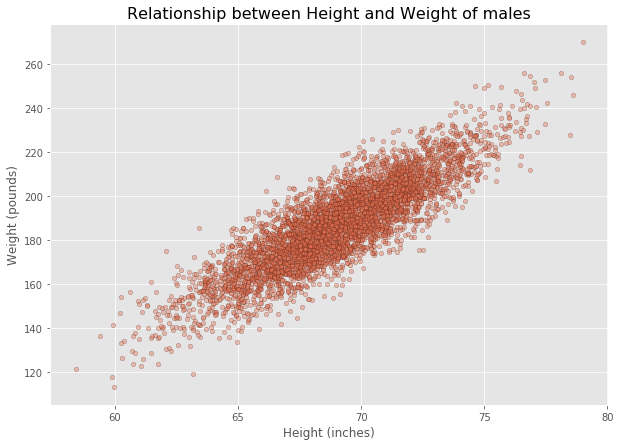

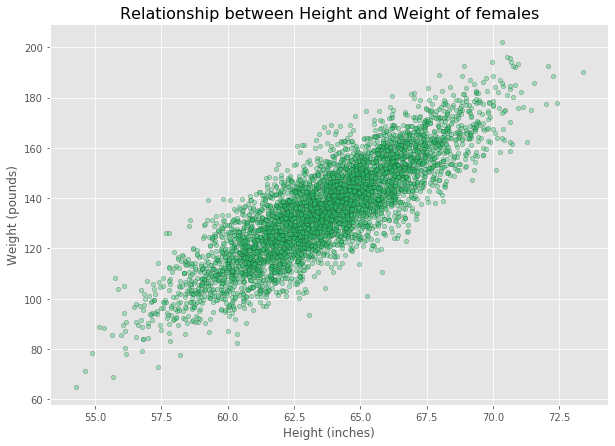

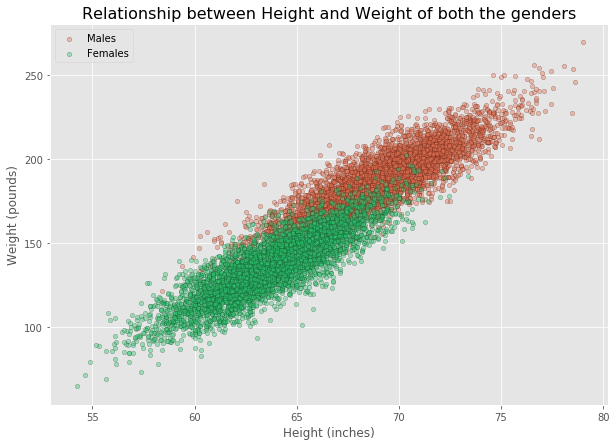

In [11]:
# Scatter plot of Height and Weight of males
df[df["Gender"]=="Male"].plot(kind="scatter", x="Height", y="Weight", color="#E77456", alpha=0.4, edgecolor="#4F1809", figsize=(10,7))
plt.title("Relationship between Height and Weight of males", size=16)
plt.xlabel("Height (inches)", size=12)
plt.ylabel("Weight (pounds)", size=12)
plt.show()

# Scatter plot of Height and Weight of females
df[df["Gender"]=="Female"].plot(kind="scatter", x="Height", y="Weight", color="#2FC66F", alpha=0.4, edgecolor="#113D24", figsize=(10,7))
plt.title("Relationship between Height and Weight of females", size=16)
plt.xlabel("Height (inches)", size=12)
plt.ylabel("Weight (pounds)", size=12)
plt.show()

# Scatter plot of Height and Weight of both the genders
ax1 = df[df["Gender"]=="Male"].plot(kind="scatter", x="Height", y="Weight", color="#E77456", alpha=0.4, edgecolor="#4F1809", figsize=(10,7))
df[df["Gender"]=="Female"].plot(kind="scatter", x="Height", y="Weight", color="#2FC66F", alpha=0.4, edgecolor="#113D24", figsize=(10,7), ax=ax1)
plt.legend(labels=['Males','Females'])
plt.title("Relationship between Height and Weight of both the genders", size=16)
plt.xlabel("Height (inches)", size=12)
plt.ylabel("Weight (pounds)", size=12)
plt.show()

### Simple Linear Regression
<b>Simple linear regression</b> is a linear approach to modeling the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data.<br><br>
y =a+bx<br><br>
where x is the independent variable (height), y is the dependent variable (weight), b is the slope, and a is the intercept. The intercept represents the value of y when x is 0 and the slope indicates the steepness of the line. The objective is to obtain the line that best fits our data (the line that minimize the sum of square errors). The error is the difference between the real value y and the predicted value y_hat, which is the value obtained using the calculated linear equation.<br><br>
error = y(real)-y(predicted) = y(real)-(a+bx)<br><br>
We can easily obtain this line using Numpy. Numpy is a python package for scientific computing that provides high-performance multidimensional arrays objects. The numpy function polyfit numpy.polyfit(x,y,deg) fits a polynomial of degree deg to points (x, y), returning the polynomial coefficients that minimize the square error. In the following lines of code, we obtain the polynomials to predict the weight for females and males.

Male parameters [   5.96177381 -224.49884071]
Female parameters [   5.99404661 -246.01326575]


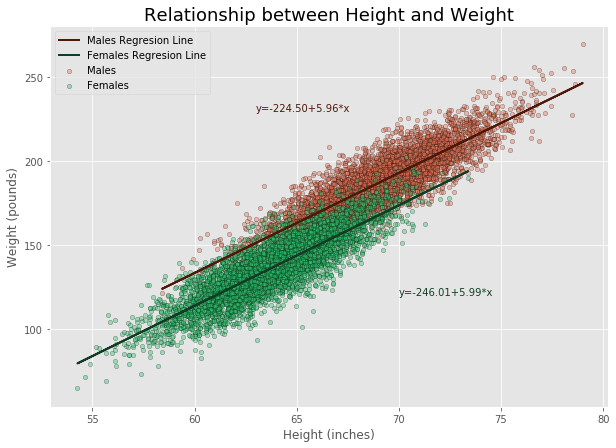

In [12]:
# Best fit polynomials
df_males = df[df["Gender"]=="Male"]
df_females = df[df["Gender"]=="Female"]


#Polynomial fit for males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
print("Male parameters", male_fit)

# Polynomial fit for females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
print("Female parameters", female_fit)

# Scatter plots
ax1 = df_males.plot(kind="scatter", x="Height", y="Weight", color="#E77456", alpha=0.4, edgecolor="black", figsize=(10,7))
df_females.plot(kind="scatter", x="Height", y="Weight", color="#2FC66F", alpha=0.4, edgecolor="black", figsize=(10,7), ax=ax1)

# Regression lines
plt.plot(df_males.Height, male_fit[0]*df_males.Height+male_fit[1], color="#4F1809", linewidth=2)
plt.plot(df_females.Height, female_fit[0]*df_females.Height+female_fit[1], color="#113D24", linewidth=2)

# Regression equations.
plt.text(63,230,'y={:.2f}+{:.2f}*x'.format(male_fit[1],male_fit[0]),color='#4F1809',size=10)
plt.text(70,120,'y={:.2f}+{:.2f}*x'.format(female_fit[1],female_fit[0]),color='#113D24',size=10)

# Legend, title and labels.
plt.legend(labels=['Males Regresion Line','Females Regresion Line', 'Males','Females'])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12)
plt.show()

The previous plot presents overplotting as 10000 samples are plotted. The plot shows a positive linear relation between height and weight for males and females. For a better visualization, the following figure shows a regression plot of 300 randomly selected samples.

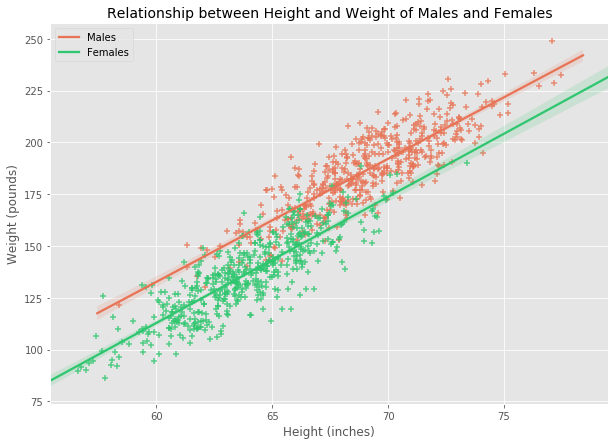

In [13]:
# Sample of 500
df_males_sample = df[df["Gender"]=="Male"].sample(500)
df_females_sample = df[df["Gender"]=="Female"].sample(500)

# Regression using seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color="#E77456", marker="+")
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color="#2FC66F", marker="+")

# Legend, Title and Labels

plt.legend(labels=["Males","Females"])
plt.title("Relationship between Height and Weight of Males and Females", size=14)
plt.xlabel("Height (inches)", size=12)
plt.ylabel("Weight (pounds)", size=12)
plt.show()

### Fitting a simple linear model using sklearn
<b>Scikit-learn</b> is a free machine learning library for python. We can easily implement linear regression with Scikit-learn using the LinearRegression class. After creating a linear regression object, we can obtain the line that best fits our data by calling the fit method.

In [14]:
# -----------For Males-----------

df_males = df[df['Gender']=='Male']

# Create linear regression object.
lr_males= LinearRegression()

# Fit linear regression.
lr_males.fit(df_males[['Height']], df_males['Weight'])

# Get the slope and intercept of the line best fit.
print(lr_males.intercept_)

print(lr_males.coef_)

# -----------******-----------

# -----------For Females-----------

df_females = df[df['Gender']=='Female']

# Create linear regression object.
lr_females= LinearRegression()

# Fit linear regression.
lr_females.fit(df_females[['Height']], df_females['Weight'])

# Get the slope and intercept of the line best fit.
print(lr_females.intercept_)

print(lr_females.coef_)

# -----------******-----------

-224.49884070545875
[5.96177381]
-246.01326574667272
[5.99404661]


### Pearson correlation coefficients
<b>Correlation</b> measures the extent to which two variables are related. The Pearson correlation coefficient is used to measure the strength and direction of the linear relationship between two variables. This coefficient is calculated by dividing the covariance of the variables by the product of their standard deviations and has a value between +1 and -1, where 1 is a perfect positive linear correlation, 0 is no linear correlation, and −1 is a perfect negative linear correlation.<br><br>
We can obtain the correlation coefficients of the variables of a dataframe by using the .corr() method. By default, Pearson correlation coefficient is calculated; however, other correlation coefficients can be computed such as, Kendall or Spearman.

In [15]:
# Correlation between Male Heights and Weights
df_males = df[df["Gender"]=="Male"]
print("Correlation between Heights and Weights of Males:", "\n\n", df_males.corr(),"\n")

# Correlation between Female Heights and Weights
df_females = df[df["Gender"]=="Female"]
print("Correlation between Heights and Weights of Females:", "\n\n", df_females.corr())

Correlation between Heights and Weights of Males: 

           Height    Weight
Height  1.000000  0.862979
Weight  0.862979  1.000000 

Correlation between Heights and Weights of Females: 

           Height    Weight
Height  1.000000  0.849609
Weight  0.849609  1.000000


In [16]:
# Using Scipy.stats library

# -------------------For Males-------------------

m_coeff, m_p_value = stats.pearsonr(df_males.Height, df_males.Weight)
print("-------------------For Males-------------------\n")
print("Pearson eofficient:", m_coeff,"\n", "P-value: %.3f"% m_p_value,"\n")

# -------------------For females-------------------
fm_coeff, fm_p_value = stats.pearsonr(df_females.Height, df_females.Weight)
print("-------------------For Females-------------------\n")
print("Pearson eofficient:", fm_coeff,"\n", "P-value: %.3f"% fm_p_value,"\n")

-------------------For Males-------------------

Pearson eofficient: 0.8629788486163175 
 P-value: 0.000 

-------------------For Females-------------------

Pearson eofficient: 0.8496085914186011 
 P-value: 0.000 



A rule of thumb for interpreting the size of the correlation coefficient is the following:<br>
1–0.8 → Very strong<br>
0.799–0.6 → Strong<br>
0.599–0.4 → Moderate<br>
0.399–0.2 → Weak<br>
0.199–0 → Very Weak<br><br>
In previous calculations, we have obtained a Pearson correlation coefficient larger than 0.8, meaning that height and weight are strongly correlated for both males and females.<br><br>
We can also calculate the Pearson correlation coefficient using the stats package of Scipy. The function scipy.stats.pearsonr(x, y) returns two values the Pearson correlation coefficient and the p-value.

#### Residual plot for randomly selected 500 females

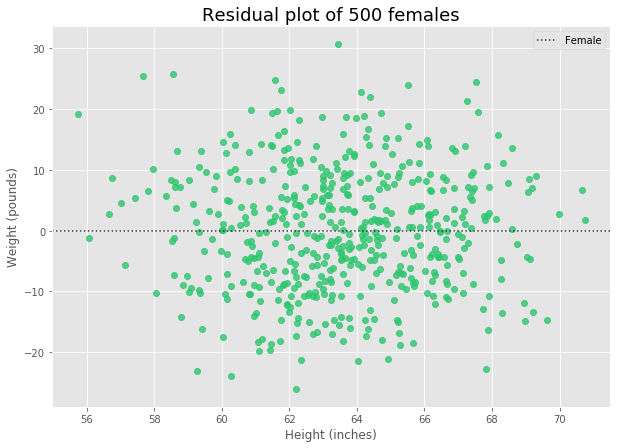

In [17]:
# Creating a sample of 500 females 
df_females = df[df["Gender"]=="Female"].sample(500)

# Residual plot of 500 female samples
fig = plt.figure(figsize=(10,7))
sns.residplot(df_females.Height, df_females.Weight, color="#2FC66F")
plt.legend(labels=["Female"])
plt.title("Residual plot of 500 females", size=18)
plt.xlabel("Height (inches)", size=12)
plt.ylabel("Weight (pounds)", size=12)
plt.show()

#### Residual plot for randomly selected 500 females

Text(0.5, 0, 'Height (inches)')

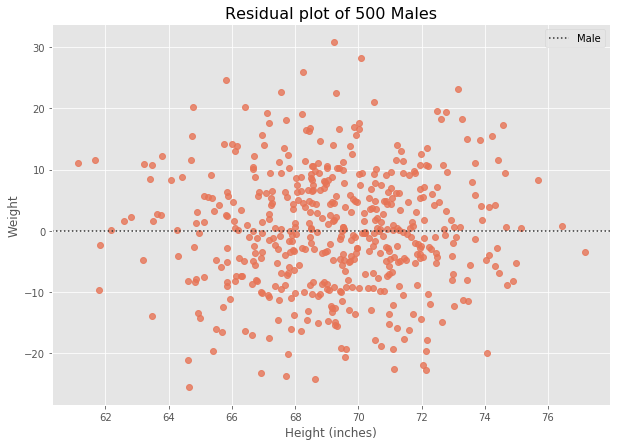

In [18]:
# Creating a sample of 500 for Males
df_males = df[df["Gender"]=="Male"].sample(500)

# Plotting a residual plot for a random sample of 500 males
fig = plt.figure(figsize=(10,7))
sns.residplot(df_males.Height, df_males.Weight, color="#E77456")
plt.legend(labels=["Male"])
plt.title("Residual plot of 500 Males", size=16)
plt.xlabel("Weight (pounds)", size=12)
plt.xlabel("Height (inches)", size=12)

### Multiple Linear Regression

In [19]:
# Making a copy of the original dataset
df_mreg = df
df_mreg.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
# Changing categorical column "Gender" into continuous column
df_mreg['Male'] = df_mreg['Gender'].map( {'Male':1, 'Female':0} )
df_mreg['Female'] = df_mreg['Gender'].map( {'Male':0, 'Female':1} )
df_mreg.drop(['Gender'], axis = 1, inplace=True)

# Rearranging the columns
df_mreg = df_mreg.reindex(columns=['Male', 'Female', 'Height', 'Weight'])
df_mreg.head()

,Male,Female,Height,Weight
0,1,0,73.847017,241.893563
1,1,0,68.781904,162.310473
2,1,0,74.110105,212.740856
3,1,0,71.730978,220.042470
4,1,0,69.881796,206.349801


In [21]:
# Removing multicollinearity by dropping separate Male and Female columns. Going forward, Male=1 and Female=0.
# Drop female column.
df_mreg.drop('Female',axis=1,inplace=True)

# Rename Gender_Male column.
df_mreg.rename(columns={'Male':'Gender'}, inplace=True)

# df_dummy dataframe first 5 columns.
df_mreg.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


#### Creating a multiple linear regression

In [22]:
# Create a multiple linear regression object.
mlr= LinearRegression()

# Fit linear regression.
mlr.fit(df_mreg[['Height','Gender']], df_mreg['Weight'])

# Get the slope and intercept of the line best fit.
print("The intercept term is: %.2f" % mlr.intercept_)

print("The coefficient of Height is: %.2f" % mlr.coef_[0])
print("The coefficient of Gender is: %.2f" % mlr.coef_[1])
print("The regression equation is: y = {:.2f} + {:.2f}*gender + {:.2f}*height".format(mlr.intercept_,mlr.coef_[1],mlr.coef_[0]))

The intercept term is: -244.92
The coefficient of Height is: 5.98
The coefficient of Gender is: 19.38
The regression equation is: y = -244.92 + 19.38*gender + 5.98*height
